In [1]:
#goal is to predict whether an employee will attrite
#approach is to train a ensemble of decision tree classifiers
#will be using the intel extension for optimized algorithims from sci-kit learn

In [2]:
#import necessary things
import pandas as pd
import matplotlib as plt


In [3]:
#fire up the intel extension
#for drop in acceleration
#from sklearnex import patch_sklearn, config_context

#patching sci-kit learn with the good sh*t
#patch_sklearn()


In [4]:
#read in data
data = pd.read_csv("watson_healthcare_modified.csv", index_col = 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 1313919 to 1152329
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   Attrition                 1676 non-null   object
 2   BusinessTravel            1676 non-null   object
 3   DailyRate                 1676 non-null   int64 
 4   Department                1676 non-null   object
 5   DistanceFromHome          1676 non-null   int64 
 6   Education                 1676 non-null   int64 
 7   EducationField            1676 non-null   object
 8   EmployeeCount             1676 non-null   int64 
 9   EnvironmentSatisfaction   1676 non-null   int64 
 10  Gender                    1676 non-null   object
 11  HourlyRate                1676 non-null   int64 
 12  JobInvolvement            1676 non-null   int64 
 13  JobLevel                  1676 non-null   int64 
 14  JobRole        

In [6]:
data.select_dtypes(['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
EmployeeID,,,,,,,,,
1313919,No,Travel_Rarely,Cardiology,Life Sciences,Female,Nurse,Single,Y,Yes
1200302,No,Travel_Frequently,Maternity,Life Sciences,Male,Other,Married,Y,No
1060315,Yes,Travel_Rarely,Maternity,Other,Male,Nurse,Single,Y,Yes
1272912,No,Travel_Frequently,Maternity,Life Sciences,Female,Other,Married,Y,Yes
1414939,No,Travel_Rarely,Maternity,Medical,Male,Nurse,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1117656,Yes,Travel_Rarely,Neurology,Technical Degree,Male,Nurse,Single,Y,Yes
1152327,No,Travel_Rarely,Cardiology,Marketing,Female,Nurse,Married,Y,Yes
1812428,No,Travel_Rarely,Maternity,Life Sciences,Female,Other,Single,Y,No


In [7]:
#get a list of columns
columns = data.columns.values.tolist()
print(columns)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [8]:
#extract all of the columns that are objects to a list
objects_col = data.select_dtypes('object').columns.values.tolist()
print(objects_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [9]:
#create a list of all the int64 columns
int64_col = data.select_dtypes('int64').columns.values.tolist()
print(int64_col)
print(len(int64_col))
#confirm we got all the columns
print(len(int64_col)+len(objects_col))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
25
34


In [10]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [11]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.001441,-0.010079,0.204655,NaN,0.008945,0.034671,0.034193,0.518333,-0.015848,...,0.058528,NaN,0.037117,0.692512,-0.015408,-0.004878,0.319012,0.222655,0.217212,0.215909
DailyRate,0.001441,1.000000,-0.009227,-0.015881,NaN,0.010620,0.027128,0.058864,0.009005,0.032115,...,0.014539,NaN,0.054407,0.009378,0.001901,-0.028549,-0.026892,0.019651,-0.034571,-0.025272
DistanceFromHome,-0.010079,-0.009227,1.000000,0.015937,NaN,-0.019730,0.026947,0.010281,-0.023455,-0.004758,...,0.005482,NaN,0.029180,-0.017663,-0.055471,-0.037821,-0.007420,0.011448,-0.000126,0.000403
Education,0.204655,-0.015881,0.015937,1.000000,NaN,-0.031925,0.017996,0.041046,0.093227,-0.003957,...,-0.005750,NaN,0.024451,0.143324,-0.014070,0.003933,0.057461,0.051029,0.045785,0.055096
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.008945,0.010620,-0.019730,-0.031925,NaN,1.000000,-0.057505,-0.007220,0.008277,0.001518,...,0.003221,NaN,0.005283,0.000208,-0.017722,0.027262,-0.000448,0.012241,0.005866,-0.012417
HourlyRate,0.034671,0.027128,0.026947,0.017996,NaN,-0.057505,1.000000,0.034741,-0.018830,-0.073942,...,0.000601,NaN,0.051862,0.005988,-0.007194,-0.009956,-0.014742,-0.016776,-0.028642,-0.021436
JobInvolvement,0.034193,0.058864,0.010281,0.041046,NaN,-0.007220,0.034741,1.000000,-0.013660,-0.039738,...,0.045107,NaN,0.025999,-0.001576,-0.031580,-0.006931,-0.013652,0.020541,-0.022153,0.031574
JobLevel,0.518333,0.009005,-0.023455,0.093227,NaN,0.008277,-0.018830,-0.013660,1.000000,-0.012497,...,0.030606,NaN,0.010478,0.780929,-0.004251,0.047481,0.532529,0.387624,0.343102,0.379717
JobSatisfaction,-0.015848,0.032115,-0.004758,-0.003957,NaN,0.001518,-0.073942,-0.039738,-0.012497,1.000000,...,-0.018232,NaN,0.017740,-0.021435,-0.003440,-0.017280,0.005376,-0.001337,-0.013595,-0.023042


<module 'matplotlib' from 'C:\\Users\\logan\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\__init__.py'>

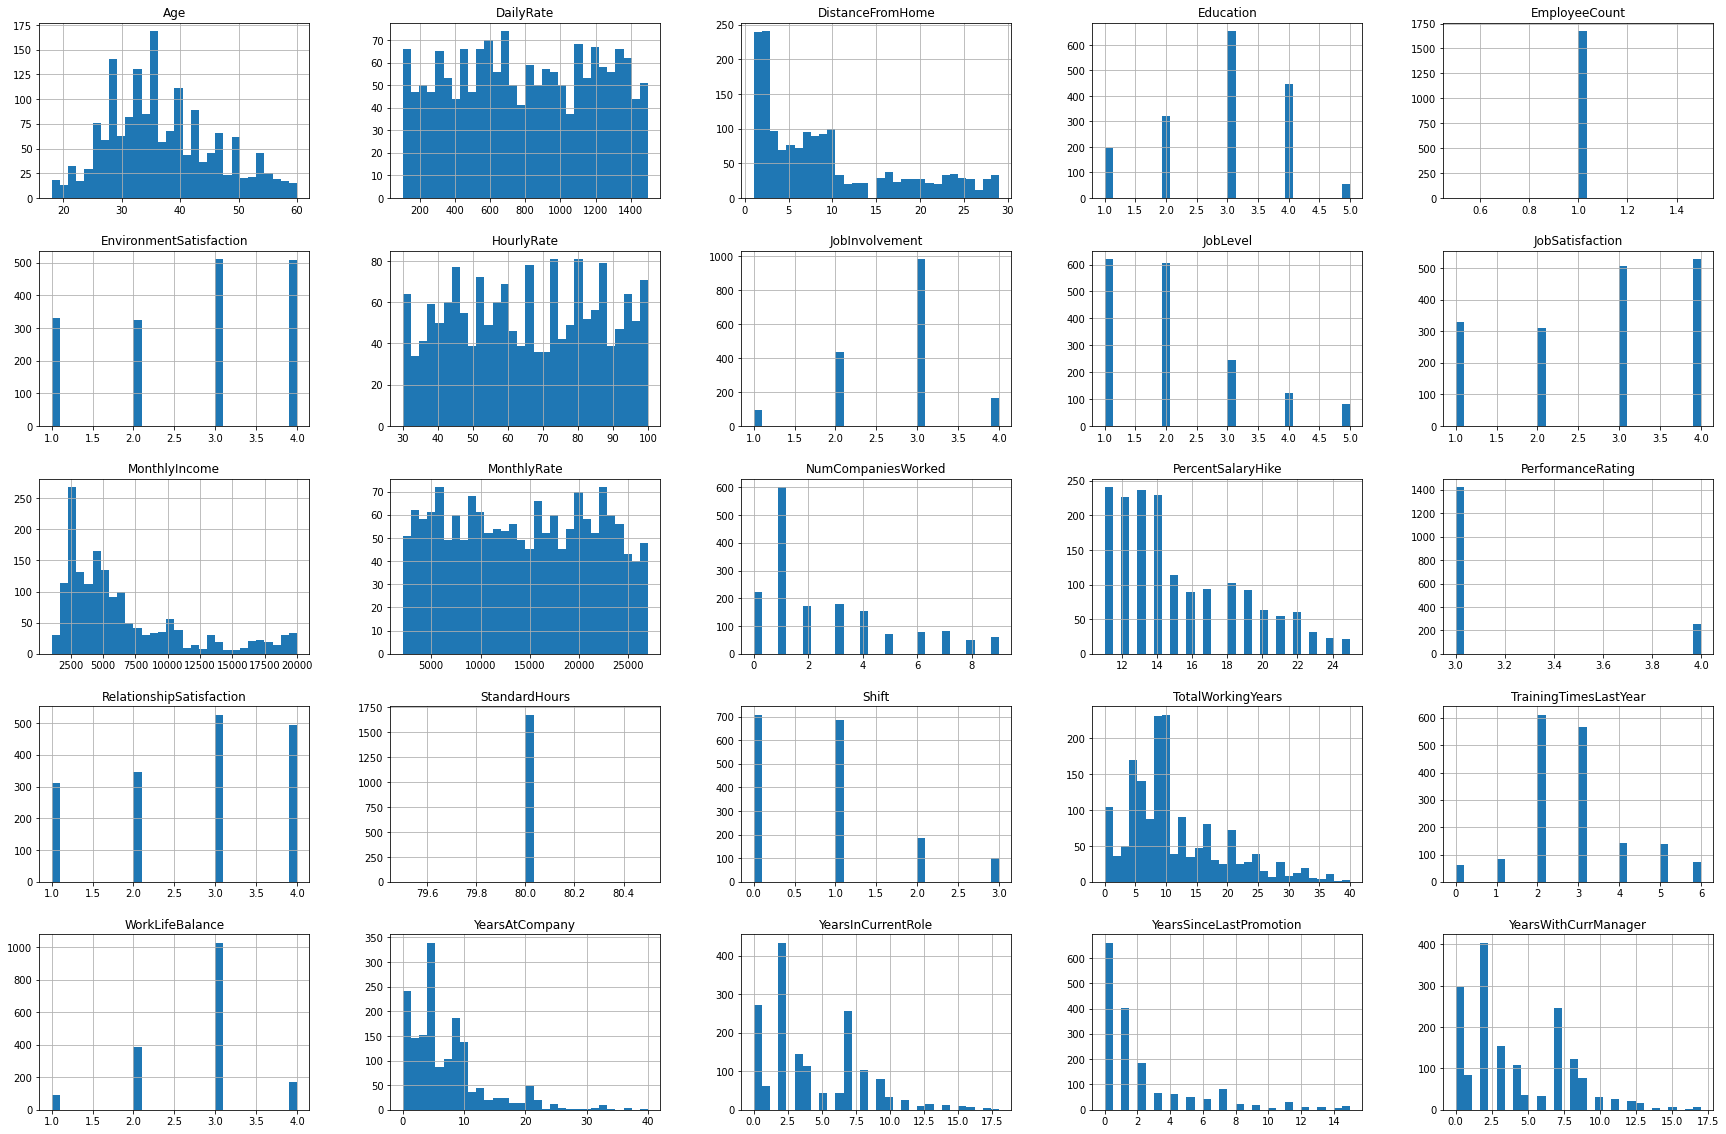

In [12]:
data.hist(bins = 30, figsize= (30,20))
plt

In [13]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,2.738663,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,1.104005,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
data['StandardHours'].value_counts()

data.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1313919,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1200302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1060315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1272912,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1414939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117656,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1152327,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1812428,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
display(data.iloc[3])

Age                                        33
Attrition                                  No
BusinessTravel              Travel_Frequently
DailyRate                                1392
Department                          Maternity
DistanceFromHome                            3
Education                                   4
EducationField                  Life Sciences
EmployeeCount                               1
EnvironmentSatisfaction                     4
Gender                                 Female
HourlyRate                                 56
JobInvolvement                              3
JobLevel                                    1
JobRole                                 Other
JobSatisfaction                             3
MaritalStatus                         Married
MonthlyIncome                            2909
MonthlyRate                             23159
NumCompaniesWorked                          1
Over18                                      Y
OverTime                          

In [16]:
#do a bit of cleaning
#drop the standard hours because they're all 80 and
#over 18 because they all are
#drop all the null values because I don't want them

data.drop('StandardHours', axis = 1, inplace=True)
data.drop('Over18',axis = 1, inplace = True)

#then redo the lists for objects and integers

#create a list of all the int64 columns
int64_col = data.select_dtypes('int64').columns.values.tolist()
print(int64_col)
print(len(int64_col))
#confirm we got all the columns, minus 1 this time
print(len(int64_col)+len(objects_col))

#extract all of the columns that are objects to a list
objects_col = data.select_dtypes('object').columns.values.tolist()
print(objects_col)


['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
24
33
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [17]:
iter = 0
for i in objects_col:
    print(data[objects_col[iter]].value_counts())
    iter+=1

No     1477
Yes     199
Name: Attrition, dtype: int64
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64
Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64
Male      998
Female    678
Name: Gender, dtype: int64
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64
Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64
No     1200
Yes     476
Name: OverTime, dtype: int64


In [18]:
#create target set
y = pd.DataFrame()

y[0] = data['Attrition'].copy()
#create feature set
X = data.drop('Attrition', axis = 1)

#take out attrition otherwise it'll ruin the pipeline
objects_col.remove('Attrition')


In [19]:
y.info()
y.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 1313919 to 1152329
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1676 non-null   object
dtypes: object(1)
memory usage: 26.2+ KB


,0
EmployeeID,
1313919,No
1200302,No
1060315,Yes


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 1313919 to 1152329
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   BusinessTravel            1676 non-null   object
 2   DailyRate                 1676 non-null   int64 
 3   Department                1676 non-null   object
 4   DistanceFromHome          1676 non-null   int64 
 5   Education                 1676 non-null   int64 
 6   EducationField            1676 non-null   object
 7   EmployeeCount             1676 non-null   int64 
 8   EnvironmentSatisfaction   1676 non-null   int64 
 9   Gender                    1676 non-null   object
 10  HourlyRate                1676 non-null   int64 
 11  JobInvolvement            1676 non-null   int64 
 12  JobLevel                  1676 non-null   int64 
 13  JobRole                   1676 non-null   object
 14  JobSatisfaction

In [21]:
if isinstance(y, pd.DataFrame):
    print("is dataframe")
else:
    print("not a dataframe")

is dataframe


In [22]:
#need to convert "yes" and "no" into binary for the purpose of the
#target set
y.replace({'Attrition':
    {'No':0,'Yes':1}})
y.head(2)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 1313919 to 1152329
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1676 non-null   object
dtypes: object(1)
memory usage: 26.2+ KB


In [23]:
#aight now let's make the test and train sets for funsies
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 69)

In [24]:
#alright let's make a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

full_ml_pipe = ColumnTransformer([
    ('std_scaler',StandardScaler(), int64_col),
    ("encoder", OneHotEncoder(), objects_col)
])

X_train_prepped = full_ml_pipe.fit_transform(X_train)

In [25]:
#now here is where we build the 
#ensemble model
#of decision tree classifiers
#and cross validate on a bunch of data
#that makes my pc cry
#and cry
#and cry
#pray I can do offload to GPU
#1080ti

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

param_grid = [
    {'n_estimators': [100, 500, 1000], 'max_leaf_nodes': [5, 10, 15]}
]

rnd_cl = RandomForestClassifier(n_jobs=-1)

grid_search = GridSearchCV(rnd_cl, param_grid, cv = 5, scoring = 'accuracy', return_train_score= True)


grid_search.fit(X_train_prepped, y_train.values.ravel())




GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'max_leaf_nodes': [5, 10, 15],
                          'n_estimators': [100, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [26]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(max_leaf_nodes=15, n_jobs=-1)

In [27]:
X_test_prepped = full_ml_pipe.fit_transform(X_test)
preds_test = final_model.predict(X_test_prepped)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test.values.ravel(),preds_test))

rfc_acc = accuracy_score(y_test.values.ravel(),preds_test)

from sklearn.metrics import roc_auc_score

roc_auc_score_rfc = roc_auc_score(y_test, final_model.predict_proba(X_test_prepped)[:,1])





0.8898809523809523


In [28]:
model_acc_scores = pd.DataFrame(columns = ['Model','Accuracy', 'ROC_AUC_Score'])
model_acc_scores = model_acc_scores.append({'Model': 'RandomForestClassifier', 'Accuracy': rfc_acc, 'ROC_AUC_Score': roc_auc_score_rfc}, ignore_index = True)

model_acc_scores.head(1)

C:\Users\logan\AppData\Local\Temp\ipykernel_32844\2555251079.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_acc_scores = model_acc_scores.append({'Model': 'RandomForestClassifier', 'Accuracy': rfc_acc, 'ROC_AUC_Score': roc_auc_score_rfc}, ignore_index = True)


,Model,Accuracy,ROC_AUC_Score
0,RandomForestClassifier,0.889881,0.89018


In [29]:
#huh, that's not that great, what if we just use a regular old decision tree

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

param_grid_tree_clf = [
    {'max_leaf_nodes': [5, 10, 15], 'max_depth': [2,5,10]}
]

grid_search_tree_clf = GridSearchCV(tree_clf, param_grid_tree_clf, cv = 5, scoring = 'accuracy', return_train_score = True)

grid_search_tree_clf.fit(X_train_prepped, y_train.values.ravel())

final_clf_model = grid_search_tree_clf.best_estimator_
print(final_clf_model)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)


In [30]:
X_test_prepped = full_ml_pipe.fit_transform(X_test)
preds_test_clf = final_clf_model.predict(X_test_prepped)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test.values.ravel(),preds_test_clf))

clf_acc = accuracy_score(y_test.values.ravel(),preds_test_clf)

print(clf_acc)

roc_auc_score_clf = roc_auc_score(y_test, final_clf_model.predict_proba(X_test_prepped)[:,1])

model_acc_scores = model_acc_scores.append({'Model': 'DecisionTreeClassifier', 'Accuracy': clf_acc, 'ROC_AUC_Score': roc_auc_score_clf}, ignore_index = True)

model_acc_scores.head(5)

0.8720238095238095
0.8720238095238095


C:\Users\logan\AppData\Local\Temp\ipykernel_32844\2690036789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_acc_scores = model_acc_scores.append({'Model': 'DecisionTreeClassifier', 'Accuracy': clf_acc, 'ROC_AUC_Score': roc_auc_score_clf}, ignore_index = True)


,Model,Accuracy,ROC_AUC_Score
0,RandomForestClassifier,0.889881,0.890180
1,DecisionTreeClassifier,0.872024,0.765292


In [34]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [['lr', log_clf], ('rf',rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)

voting_clf.fit(X_train_prepped, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_prepped,y_train)
    y_pred_this = clf.predict(X_test_prepped)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred_this))

#voting_clf_acc = accuracy_score(y_test, clf.predict(X_test_prepped))

#roc_auc_score_voting_clf = roc_auc_score(y_test, voting_clf.predict_proba(X_test_prepped)[:,1])

model_acc_scores = model_acc_scores.append({'Model': 'VotingEnsembleClassifier', 'Accuracy': voting_clf_acc, 'ROC_AUC_Score': 'NA'}, ignore_index = True)

model_acc_scores.head(5)

c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\logan\AppData\Local\Temp\ipykernel_32844\4143956571.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(

LogisticRegression 0.9136904761904762
RandomForestClassifier 0.9017857142857143
SVC 0.9017857142857143


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.9107142857142857


C:\Users\logan\AppData\Local\Temp\ipykernel_32844\4143956571.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_acc_scores = model_acc_scores.append({'Model': 'VotingEnsembleClassifier', 'Accuracy': voting_clf_acc, 'ROC_AUC_Score': 'NA'}, ignore_index = True)


,Model,Accuracy,ROC_AUC_Score
0,RandomForestClassifier,0.889881,0.89018
1,DecisionTreeClassifier,0.872024,0.765292
2,VotingEnsembleClassifier,0.913690,NA
